# Athuga niðurstöður

In [1]:
import os
from pathlib import Path
from pprint import pprint
import matplotlib.pyplot as plt
import statistics

import frontend.core as c
import frontend.bulk as b
import frontend.definitions as d

%matplotlib notebook

working_dir = Path('/work/haukurpj')
p = working_dir.joinpath('process')

IS = c.Lang.IS
EN = c.Lang.EN

langs = [IS, EN]

2020-01-15 11:37:29,478 - frontend - INFO - Initialized


In [2]:
!ls -lt /work/haukurpj/

total 50
drwxr-xr-x 4 haukurpj local-staff   4 Jan  9 15:49 en-is-intersection
drwxr-xr-x 5 haukurpj local-staff   5 Jan  9 15:42 en-is-grow
drwxr-xr-x 5 haukurpj local-staff   5 Jan  9 15:24 en-is-grow-diag-final-and
drwxr-xr-x 5 haukurpj local-staff   5 Jan  9 14:20 en-is-union
drwxr-xr-x 2 haukurpj local-staff 218 Jan  9 10:35 process
drwxr-xr-x 5 haukurpj local-staff   5 Jan  7 15:43 en-is-grow-diag
drwxr-xr-x 5 haukurpj local-staff   5 Jan  7 15:14 en-is-tokenization
drwxr-xr-x 5 haukurpj local-staff   5 Jan  7 15:01 en-is-grow-diag-final
drwxr-xr-x 5 haukurpj local-staff   5 Jan  7 14:48 is-en-tokenization
drwxr-xr-x 5 haukurpj local-staff   5 Jan  7 14:27 en-is-grow-final
drwxr-xr-x 5 haukurpj local-staff   5 Dec 16 19:38 is-en-mono
drwxr-xr-x 5 haukurpj local-staff   5 Dec 16 19:29 en-is-mideind-v2
drwxr-xr-x 5 haukurpj local-staff   5 Dec 16 19:21 is-en-mideind-v2
drwxr-xr-x 5 haukurpj local-staff   5 Dec 10 17:50 en-is-nltk
drwxr-xr-x 5 haukurpj local-staff   5 Dec 10 17:28 i

In [3]:
models = [
    'en-is-mideind-v2',
    'en-is-intersection',
    'en-is-union',
    'en-is-grow',
    'en-is-grow-final',
    'en-is-grow-diag',
    'en-is-grow-diag-final',
    'en-is-grow-diag-final-and',
]

In [4]:
def bleu_score(model):
    score = !cat {working_dir.joinpath(model).joinpath('binarised').joinpath('translated.bleu')}
    return score[0]

In [5]:
pprint([bleu_score(model) for model in models])

['BLEU = 48.56, 69.7/51.5/42.7/36.3 (BP=1.000, ratio=1.003, hyp_len=37548, '
 'ref_len=37435)',
 'cat: /work/haukurpj/en-is-intersection/binarised/translated.bleu: No such '
 'file or directory',
 'BLEU = 44.01, 67.1/47.3/37.9/31.2 (BP=1.000, ratio=1.001, hyp_len=37463, '
 'ref_len=37435)',
 'BLEU = 48.59, 69.3/51.3/42.8/36.6 (BP=1.000, ratio=1.005, hyp_len=37621, '
 'ref_len=37435)',
 'BLEU = 45.33, 67.8/48.5/39.3/32.7 (BP=1.000, ratio=1.003, hyp_len=37533, '
 'ref_len=37435)',
 'BLEU = 48.95, 69.8/51.8/43.1/36.9 (BP=1.000, ratio=1.000, hyp_len=37445, '
 'ref_len=37435)',
 'BLEU = 45.67, 68.1/48.8/39.6/33.0 (BP=1.000, ratio=1.002, hyp_len=37516, '
 'ref_len=37435)',
 'BLEU = 48.47, 69.4/51.4/42.6/36.3 (BP=1.000, ratio=1.005, hyp_len=37612, '
 'ref_len=37435)']


In [168]:
def peeks(paths, length: int = 10):
    generators = [b.peek(paths[model_name], length) for model_name in paths]
    remaining = True
    while remaining:
        for index, model_name in enumerate(paths):
            try:
                sentence = next(generators[index])
                yield f'{model_name:<20}: {sentence}'
            except StopIteration:
                return

In [169]:
def get_model_translated(model_name):
    model_dir = working_dir.joinpath(model_name).joinpath('binarised')
    translated = list(model_dir.glob("translated.is"))
    if translated:
        return translated[0]
    else:
        return list(model_dir.glob("translated.en"))[0]

In [172]:
check = {
    'source': working_dir.joinpath('process').joinpath('parice-test-final.en'),
    'target': working_dir.joinpath('process').joinpath('parice-test-final.is'),
    'en-is-mideind-v2': get_model_translated('en-is-mideind-v2'),
    'en-is-grow-final': get_model_translated('en-is-grow-final')
}

In [173]:
print(*peeks(check, 30))

source              : • 6 km for category 2 motorcycle ( engine capacity ≥ 150 cc , vmax _lt_ 130 km / h ) ,
 target              : • 6 km fyrir bifhjól í flokki 2 ( slagrými hreyfils ≥ 150 cc , vmax _lt_ 130 km/klst. ) ,
 en-is-mideind-v2    : • 6 km fyrir bifhjól í flokki 2 ( slagrými hreyfils ≥ 150 cc , vmax _lt_ 130 km/klst. ) , 
 en-is-grow-final    : • 6 km fyrir bifhjól í flokki 2 ( slagrými hreyfils ≥ 150 cc , vmax _lt_ 130 km/klst. ) , 
 source              : e. common learning article 5 ( 1 ) ( e )
 target              : e. aðgerð varðandi sameiginlega fræðslu e-liður 1. mgr. 5. gr .
 en-is-mideind-v2    : e. aðgerð varðandi sameiginlega fræðslu í g-lið 1. mgr. 5. gr. ) 
 en-is-grow-final    : e. aðgerð varðandi sameiginlega fræðslu 1. mgr. 5. gr. e ) 
 source              : measurement of exhaust gas opacity with free acceleration ( no load from idling up to cut-off speed ) .
 target              : mælingar á reykþéttni útblásturslofts við hröðun ( frá hægagangi og upp í mar

## Skoða features

In [124]:
raw_features = !tail -n 7 {working_dir}/is-en*/binarised/moses.ini

In [125]:
raw_features

['==> /work/haukurpj/is-en-again/binarised/moses.ini <==',
 'LexicalReordering0= 0.062315 0.00394016 0.0126292 0.000990837 0.096046 0.222435',
 'Distortion0= -0.016661',
 'LM0= 0.0682626',
 'WordPenalty0= -0.207948',
 'PhrasePenalty0= -0.0768412',
 'TranslationModel0= 0.0255459 0.0137957 0.184076 0.00851299',
 'UnknownWordPenalty0= 1',
 '',
 '==> /work/haukurpj/is-en-bpe/binarised/moses.ini <==',
 'LexicalReordering0= 0.112827 0.101192 0.161106 0.0255083 -0.0578299 -0.00627125',
 'Distortion0= 0.0190946',
 'LM0= 0.0733813',
 'WordPenalty0= -0.172215',
 'PhrasePenalty0= -0.0408376',
 'TranslationModel0= 0.0196174 0.019302 0.186709 -0.00410915',
 'UnknownWordPenalty0= 1',
 '',
 '==> /work/haukurpj/is-en-improved/binarised/moses.ini <==',
 'LexicalReordering0= 0.0805628 0.00896019 0.0309485 0.0332564 0.0488596 0.143036',
 'Distortion0= 0.0117075',
 'LM0= 0.0683322',
 'WordPenalty0= -0.2321',
 'PhrasePenalty0= -0.0566996',
 'TranslationModel0= 0.0403893 0.00930472 0.223308 0.0125347',
 'Un

In [126]:
features = {}
for line in raw_features:
    if not line:
        continue
    if str(working_dir) in line:
        model_name = line.split('/')[3]
        features[model_name] = {}
    else:
        feature_name, values = line.split('=')
        values = tuple(map(float, values.split(' ')[1:]))
        features[model_name][feature_name] = values

In [127]:
features

{'is-en-again': {'LexicalReordering0': (0.062315,
   0.00394016,
   0.0126292,
   0.000990837,
   0.096046,
   0.222435),
  'Distortion0': (-0.016661,),
  'LM0': (0.0682626,),
  'WordPenalty0': (-0.207948,),
  'PhrasePenalty0': (-0.0768412,),
  'TranslationModel0': (0.0255459, 0.0137957, 0.184076, 0.00851299),
  'UnknownWordPenalty0': (1.0,)},
 'is-en-bpe': {'LexicalReordering0': (0.112827,
   0.101192,
   0.161106,
   0.0255083,
   -0.0578299,
   -0.00627125),
  'Distortion0': (0.0190946,),
  'LM0': (0.0733813,),
  'WordPenalty0': (-0.172215,),
  'PhrasePenalty0': (-0.0408376,),
  'TranslationModel0': (0.0196174, 0.019302, 0.186709, -0.00410915),
  'UnknownWordPenalty0': (1.0,)},
 'is-en-improved': {'LexicalReordering0': (0.0805628,
   0.00896019,
   0.0309485,
   0.0332564,
   0.0488596,
   0.143036),
  'Distortion0': (0.0117075,),
  'LM0': (0.0683322,),
  'WordPenalty0': (-0.2321,),
  'PhrasePenalty0': (-0.0566996,),
  'TranslationModel0': (0.0403893, 0.00930472, 0.223308, 0.0125347

In [128]:
def plot_feature(feature_name, model_names, feature_values):
    fig, ax1 = plt.subplots(figsize=(9,9))
    color='tab:red'
    ax1.set_xlabel('Model name')
    ax1.set_ylabel('Feature value', color=color)
    ax1.set_title(feature_name)
    #ax1.tick_params(axis='y', labelcolor=color)
    x = range(len(model_names))
    ax1.scatter(x, feature_values)
    ax1.set_xticks(x)
    ax1.set_xticklabels(model_names, rotation=45)
    ax1.grid(linestyle='--', linewidth=1)
    legend = [
        f'Mean: {statistics.mean(feature_values)}\n'
        f'Stdev: {statistics.stdev(feature_values)}',
    ]
    ax1.legend(legend,loc='best')

<IPython.core.display.Javascript object>


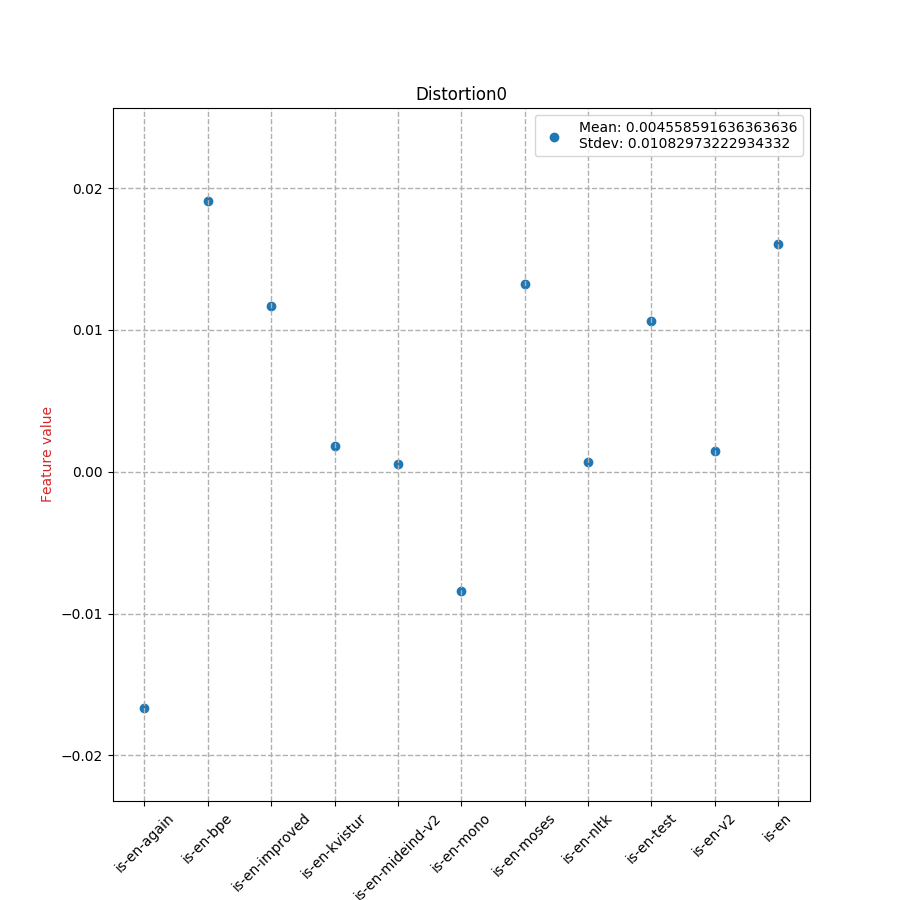

In [129]:
feature = 'Distortion0'
plot_feature(feature, features.keys(), [features[model_name][feature][0] for model_name in features])

In [135]:
def inverse_features(features):
    inv_features = {}
    for model_name in features:
        for feature in features[model_name]:
            if feature not in inv_features:
                inv_features[feature] = {}
            inv_features[feature][model_name] = features[model_name][feature]
    return inv_features

In [136]:
inv_features = inverse_features(features)

In [138]:
pprint(inv_features)

{'Distortion0': {'is-en': (0.0160226,),
                 'is-en-again': (-0.016661,),
                 'is-en-bpe': (0.0190946,),
                 'is-en-improved': (0.0117075,),
                 'is-en-kvistur': (0.00184842,),
                 'is-en-mideind-v2': (0.000575488,),
                 'is-en-mono': (-0.00842554,),
                 'is-en-moses': (0.0132123,),
                 'is-en-nltk': (0.00065453,),
                 'is-en-test': (0.0106574,),
                 'is-en-v2': (0.00145821,)},
 'LM0': {'is-en': (0.0632488,),
         'is-en-again': (0.0682626,),
         'is-en-bpe': (0.0733813,),
         'is-en-improved': (0.0683322,),
         'is-en-kvistur': (0.0607184,),
         'is-en-mideind-v2': (0.0715747,),
         'is-en-mono': (0.057654,),
         'is-en-moses': (0.0748982,),
         'is-en-nltk': (0.0789889,),
         'is-en-test': (0.0561735,),
         'is-en-v2': (0.0803623,)},
 'LexicalReordering0': {'is-en': (0.114192,
                                

In [139]:
def assign_scores_to_features(scores):
    return {
        'UnknownWordPenalty0': scores[0:1],
        'WordPenalty0': scores[1:2],
        'PhrasePenalty0': scores[2:3],
        'TranslationModel0': scores[3:7],
        'LexicalReordering0': scores[7:13],
        'Distortion0': scores[13:14],
        'LM0': scores[14:]
    }

def compute_weighted_scores(weights, scores):
    weighted_scores = {}
    feature_scores = assign_scores_to_features(scores)
    for key in weights:
        weighted_scores[key] = tuple(map(lambda x: x[0] * x[1], zip(feature_scores[key], weights[key])))
    return weighted_scores

def compute_sum(scores):
    the_sum = 0.0
    for key in scores:
        the_sum += sum(scores[key])
    return the_sum

In [ ]:
gamli maðurinn borðar kalda súpu með mjög góðri lyst . 

snjóflóðið sem féll á veginn í ljósavatnsskarði í gærkvöldi er um 500 breitt og alls óvíst hvenær verður hægt að opna veginn að nýju .
snjóflóð sem féll á veginn í ljósavatnsskarði í gærkvöldi er um 500 breitt og alls óvíst hvenær verður hægt að opna veginn að nýju .

In [143]:
model = 'is-en-improved'
gamli_madur = (0.000,-12.000,7.000,-17.242,-26.665,-6.400,-14.246,-2.723,0.000,0.000,-1.411,0.000,0.000,0.000,-60.390)
(0.000,-12.000,7.000,-17.242,-26.665,-6.400,-14.246,-2.723,0.000,0.000,-1.411,0.000,0.000,0.000,-60.390)
(0.000,-12.000,7.000,-17.242,-26.665,-6.400,-14.246,-2.723,0.000,0.000,-1.411,0.000,0.000,0.000,-60.390)
pprint(features[model])
pprint(assign_scores_to_features(gamli_madur))
weighted_scores = compute_weighted_scores(features[model], gamli_madur)
pprint(weighted_scores)
pprint(compute_sum(weighted_scores))

{'Distortion0': (0.0117075,),
 'LM0': (0.0683322,),
 'LexicalReordering0': (0.0805628,
                        0.00896019,
                        0.0309485,
                        0.0332564,
                        0.0488596,
                        0.143036),
 'PhrasePenalty0': (-0.0566996,),
 'TranslationModel0': (0.0403893, 0.00930472, 0.223308, 0.0125347),
 'UnknownWordPenalty0': (1.0,),
 'WordPenalty0': (-0.2321,)}
{'Distortion0': (0.0,),
 'LM0': (-60.39,),
 'LexicalReordering0': (-2.723, 0.0, 0.0, -1.411, 0.0, 0.0),
 'PhrasePenalty0': (7.0,),
 'TranslationModel0': (-17.242, -26.665, -6.4, -14.246),
 'UnknownWordPenalty0': (0.0,),
 'WordPenalty0': (-12.0,)}
{'Distortion0': (0.0,),
 'LM0': (-4.126581558,),
 'LexicalReordering0': (-0.2193725044, 0.0, 0.0, -0.0469247804, 0.0, 0.0),
 'PhrasePenalty0': (-0.3968972,),
 'TranslationModel0': (-0.6963923106000001,
                       -0.2481103588,
                       -1.4291712,
                       -0.17856933619999998),
 'Unkn

In [150]:
def parse_score_best_list(best_list_entry):
    scores = best_list_entry.split('|||')[2].strip()
    return scores

In [ ]:
0 ||| the old man eat cold soup with a very good appetite .  ||| LexicalReordering0= -2.72329 0 0 -1.41071 0 0 Distortion0= 0 LM0= -60.3898 WordPenalty0= -12 PhrasePenalty0= 7 TranslationModel0= -17.2425 -26.6653 -6.39957 -14.2457 ||| -3.85989
0 ||| the old man eats cold soup with a very good appetite .  ||| LexicalReordering0= -2.89013 0 0 -1.55581 0 0 Distortion0= 0 LM0= -60.5995 WordPenalty0= -12 PhrasePenalty0= 7 TranslationModel0= -14.5217 -24.6423 -7.18452 -15.4713 ||| -3.9917


In [ ]:
0 ||| the old man eat cold soup with very .  ||| LexicalReordering0= -3.30126 0 0 -0.99665 0 0 Distortion0= 0 LM0= -61.5665 WordPenalty0= -9 PhrasePenalty0= 6 TranslationModel0= -23.5619 -41.5119 -4.4697 -8.97596 ||| -5.20591
0 ||| the old man eats cold soup with a very good appetite .  ||| LexicalReordering0= -2.83309 0 0 -1.54892 0 0 Distortion0= 0 LM0= -76.8672 WordPenalty0= -12 PhrasePenalty0= 7 TranslationModel0= -14.3235 -24.63 -6.86747 -15.4647 ||| -5.67905


In [151]:
parse_score_best_list("0 ||| the old man eat cold soup with very .  ||| LexicalReordering0= -3.30126 0 0 -0.99665 0 0 Distortion0= 0 LM0= -61.5665 WordPenalty0= -9 PhrasePenalty0= 6 TranslationModel0= -23.5619 -41.5119 -4.4697 -8.97596 ||| -5.20591")

'LexicalReordering0= -3.30126 0 0 -0.99665 0 0 Distortion0= 0 LM0= -61.5665 WordPenalty0= -9 PhrasePenalty0= 6 TranslationModel0= -23.5619 -41.5119 -4.4697 -8.97596'

## Þýðingarhraði
Við metum þýðingarhraða með því að þýða prófunargögn og taka tímann á þýðingum. Þýðingartími er skilgreindur sem fjöldi orða á sekúndu, fjoldi_orda/timi.

Keyra eftirfarandi á terra/torpaq, ekki í Jupyter.

In [ ]:
!sbatch -p longrunning /home/staff/haukurpj/SMT/moses_model/moses-time-translation.sh

In [ ]:
sacct -j 865047 --format=JobID,AllocCPUS,Elapsed

Þar sem prófunargögnin eru nú þegar forunnin, og sá tími á að vera hluti af þýðingu, þá teljum við þann tíma líka.

In [41]:
import re
URI = re.compile(r"((http(s)?:\/\/)|(www)|([-a-zA-Z0-9:%_\+.~#?&/=]+?@))+([-a-zA-Z0-9@:%_\+.~#?&/=]+)", re.IGNORECASE)
URI_SIMPLE = re.compile(r"([-a-zA-Z0-9@:%_\+.~#?&/=]+?)(\.is|\.com)", re.IGNORECASE)

def preprocess_sent(sent, lang, method):    
    regexps = [
        {
            'pattern': URI,
            'repl': '_uri_'
        },
        {
            'pattern': URI_SIMPLE,
            'repl': '_uri_'
        },
        d.SUB_EMPTY_BRACKETS,
        {
            'pattern': re.compile(r"(\d+(.\d+)?)(mgr|gr|skv|og|eða|til|með|janúar|febrúar|mars|apríl|maí|júní|júlí|ágúst|september|október|nóvember|desember)", re.IGNORECASE),
            'repl': r"\1. \3",
        },
        {
            'pattern': re.compile(r"(skv)(?=[^.])"),
            'repl': r"\1."
        },
        {
            'pattern': re.compile(r"(\d+(.\d+)?\. )(mgr|gr)(?=[^.])", re.IGNORECASE),
            'repl': r"\1\3. "
        },
    ]
    sent = c.regexp(sent, regexps)
    sent = c.tokenize(sent, lang, method=method)
    sent = c.lowercase_normalize(sent)
    regexps = [
        d.SUB_PIPE,
        d.SUB_LT,
        d.SUB_GT,
        d.SUB_BRACKET_OPEN,
        d.SUB_BRACKET_CLOSE,
        d.SUB_FIX_PLACEHOLDERS
    ]
    sent = c.regexp(sent, regexps)
    return sent

def single_thread_preprocess_sent(p_in):
    lang = b._lang(p_in)
    if lang == IS:
        method = "shallow"
    else:
        method = "moses"
    with p_in.open() as f_in:
        for line in f_in:
            preprocess_sent(line, lang, method)

In [42]:
%timeit single_thread_preprocess_sent(b.read(p, EN, 'parice', 'test'))

834 ms ± 7.33 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Fjöldi orða

In [2]:
from frontend import bulk as b
token_counter = b.token_counter(working_dir.joinpath('process').joinpath('test').joinpath('combined-processed.en'))

In [3]:
fjoldi_orda = sum(token_counter.values())

In [4]:
fjoldi_orda

125129

Fyrir 10 þræði

In [6]:
# tími = þýðing + preprocess
timi = 8*60+16 + 1
hradi = fjoldi_orda/timi
hradi

251.7686116700201

Fyrir 1 þráð, id=866427

In [7]:
# tími = þýðing + preprocess
timi = 38*60+26 + 1
hradi = fjoldi_orda/timi
hradi

54.23883831816212